# Bibliothèques

In [13]:
#Importation des bibliothèques
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Fichier et colonne

In [14]:
#Ouverture du fichier 
df = pd.read_csv("ETL_csv.csv")

#df = df[df['isFraud'] == 1]

df.columns = ['id_trans', 'etape', 'type', 'montant', 'id_orig', 'old_solde_exp',
              'new_solde_exp', 'id_dest', 'old_solde_dest', 'new_solde_dest',
              'fraude']

Ajout de nouvelles colonnes

In [16]:
# Création de la colonne qui fait la différence sur le solde de l'expéditeur
df['diff_solde_orig'] = abs(df['old_solde_exp'] - df['new_solde_exp'])

# Création de la colonne qui fait la différence sur le solde du destinataire
df['diff_solde_dest'] = abs(df['old_solde_dest'] - df['new_solde_dest'])

# Créer une nouvelle colonne 'ratio_montant_old_solde_exp' qui divise montant par old_solde_exp
df['ratio_montant_solde_exp'] = df['montant'] / df['old_solde_exp']

# Création d'une colonne convertie les steps en heures
df['heure'] = df['etape'] % 24

df['journuit'] = np.where((df['heure'] >= 21) | (df['heure'] < 8), 0, 1)

# Afficher le DataFrame avec les nouvelles colonnes
print(df[['montant', 'diff_solde_orig', 'diff_solde_dest', 'ratio_montant_solde_exp', 'heure', 'journuit']])

df['journuit'].value_counts()

            montant  diff_solde_orig  diff_solde_dest  \
0           9839.64          9839.64             0.00   
1           1864.28          1864.28             0.00   
2            181.00           181.00             0.00   
3            181.00           181.00         21182.00   
4          11668.14         11668.14             0.00   
...             ...              ...              ...   
1008208   339682.13        339682.13        339682.13   
1008209  6311409.28       6311409.28             0.00   
1008210  6311409.28       6311409.28       6311409.27   
1008211   850002.52        850002.52             0.00   
1008212   850002.52        850002.52        850002.52   

         ratio_montant_solde_exp  heure  journuit  
0                       0.057834      1         0  
1                       0.087735      1         0  
2                       1.000000      1         0  
3                       1.000000      1         0  
4                       0.280795      1         0  
...

journuit
1    931090
0     77123
Name: count, dtype: int64

In [17]:
# Encodage des colonnes catégorielles
Encodageencoder = LabelEncoder() 
df["type_encod"] = Encodageencoder.fit_transform(df['type']) 
df["id_orig_encod"] = Encodageencoder.fit_transform(df['id_orig']) 
df["id_dest_encod"] = Encodageencoder.fit_transform(df['id_dest']) 
print(df)

         id_trans  etape      type     montant      id_orig  old_solde_exp  \
0               0      1   PAYMENT     9839.64  C1231006815      170136.00   
1               1      1   PAYMENT     1864.28  C1666544295       21249.00   
2               2      1  TRANSFER      181.00  C1305486145         181.00   
3               3      1  CASH_OUT      181.00   C840083671         181.00   
4               4      1   PAYMENT    11668.14  C2048537720       41554.00   
...           ...    ...       ...         ...          ...            ...   
1008208   6362615    743  CASH_OUT   339682.13   C786484425      339682.13   
1008209   6362616    743  TRANSFER  6311409.28  C1529008245     6311409.28   
1008210   6362617    743  CASH_OUT  6311409.28  C1162922333     6311409.28   
1008211   6362618    743  TRANSFER   850002.52  C1685995037      850002.52   
1008212   6362619    743  CASH_OUT   850002.52  C1280323807      850002.52   

         new_solde_exp      id_dest  old_solde_dest  new_solde_

In [18]:
# Définition des types de caractéristiques
numerical_features = ['id_trans', 'etape', 'montant', 'old_solde_exp',
                      'new_solde_exp', 'diff_solde_orig', 'old_solde_dest', 'new_solde_dest', 'diff_solde_dest',
                      'ratio_montant_solde_exp', 'heure', 'journuit', 'type_encod', 'id_orig_encod', 'id_dest_encod', 'fraude']
categorical_features = ['type', 'id_orig', 'id_dest']

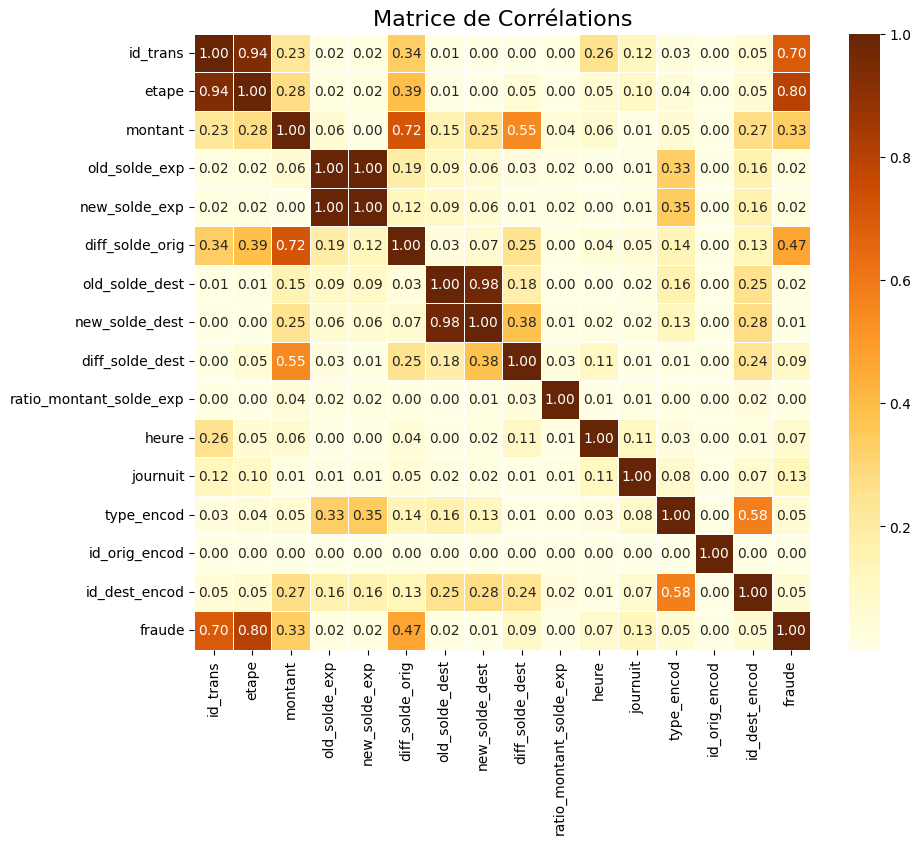

In [19]:
# Étape 1 : Calculer la matrice de corrélations
correlation_matrix = df[['id_trans', 'etape', 'montant', 'old_solde_exp',
                      'new_solde_exp', 'diff_solde_orig', 'old_solde_dest', 'new_solde_dest', 'diff_solde_dest',
                      'ratio_montant_solde_exp', 'heure', 'journuit', 'type_encod', 'id_orig_encod', 'id_dest_encod', 'fraude']].corr()

# Étape 2 : Visualiser la matrice de corrélations
plt.figure(figsize=(10, 8))  # Définir la taille de la figure
sns.heatmap(correlation_matrix.abs(), annot=True, fmt=".2f", cmap='YlOrBr', square=True, cbar=True, linewidths=0.5)
plt.title("Matrice de Corrélations", fontsize=16)
plt.show()

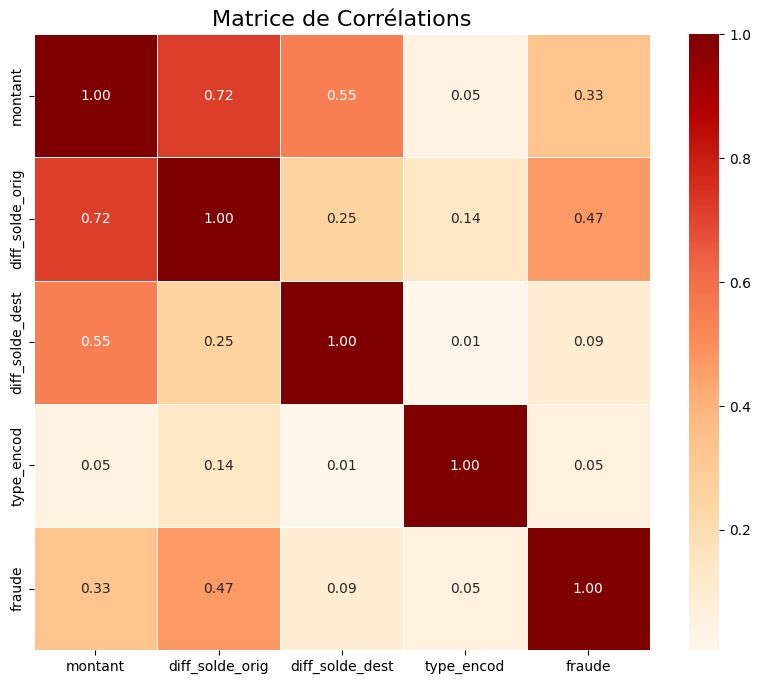

In [20]:
# Étape 1 : Calculer la matrice de corrélations
correlation_matrix = df[['montant', 'diff_solde_orig', 'diff_solde_dest', 'type_encod', 'fraude']].corr()

# Étape 2 : Visualiser la matrice de corrélations
plt.figure(figsize=(10, 8))  # Définir la taille de la figure
sns.heatmap(correlation_matrix.abs(), annot=True, fmt=".2f", cmap='OrRd', square=True, cbar=True, linewidths=0.5)
plt.title("Matrice de Corrélations", fontsize=16)
plt.show()

Colonnes à garder : 'montant', 'diff_solde_orig', 'diff_solde_dest', 'type_encod'